In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ipywidgets import interact,  FloatSlider

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import pickle

In [7]:
import numpy
print (numpy.__version__)

1.18.1


In [8]:
import pandas as pd 
print (pd.__version__)

0.25.3


In [9]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.width=100
plt.style.use('ggplot')

In [13]:
df= pd.read_csv("C:\\Users\\GAURAV\\PycharmProjects\\creditcardrev1\\prediction_module\\creditcard.csv")

In [14]:
# !pip install pandas-profiling

# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# print(profile)

# pf= ProfileReport(df)

# pf.to_widgets()


In [15]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [16]:
#Dataset
pd.set_option("display.max_columns",None)

df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,-1.109232,-0.453235,-1.046946,1.122674,1.243518,-1.431897,0.939328,-0.002373,2.894952,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [17]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [19]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Preprocessing

In [20]:
#checking the null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [21]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [22]:
legitimate = df[df.Class == 0]
fraud = df[df.Class != 0]

In [23]:
legitimate.shape

(284315, 31)

In [24]:
fraud.shape

(492, 31)

In [25]:
legitimate.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [26]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [27]:
#comparing the values between these two classs
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [28]:
legitimate_sample = legitimate.sample(n=492)

In [29]:
legitimate_sample.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
187942,127758.0,-0.485202,0.587666,0.085698,-0.431934,1.374566,0.202334,0.896042,-0.217524,-0.116074,0.440167,-0.296385,-0.069905,-0.254942,0.150060,-0.179091,-0.107982,-0.758275,0.293531,1.915813,0.070699,-0.333693,-0.528059,0.052807,-1.446018,-0.538904,0.355450,0.007015,-0.052775,1.29,0
244839,152510.0,1.875603,0.181094,-2.076932,1.625500,0.489226,-1.307852,0.706113,-0.380224,0.299181,-0.261234,-0.732194,-0.318072,-1.104935,-0.551550,-0.259634,-0.247000,0.853684,-0.015443,-0.423491,-0.169766,-0.017980,-0.018896,-0.041400,-0.139129,0.344720,-0.540012,-0.014839,-0.022011,79.99,0
206145,136085.0,-1.811019,1.609548,0.749758,-0.519634,-1.327802,1.376513,-0.347412,-2.967442,-0.422656,-1.808157,-1.127925,0.227951,-0.158191,0.696153,1.012889,0.500995,-0.150369,0.231388,0.119483,0.262716,-0.655070,-0.303722,0.201708,0.542248,0.293152,-0.432991,0.089903,-0.014844,227.78,0
145588,87070.0,0.145268,0.482917,1.038026,-0.248272,-0.125166,-0.346217,0.266905,-0.063561,0.370229,-0.523401,-1.179512,0.536796,1.204927,-0.517466,-0.057102,0.088242,-0.565921,0.140256,0.082554,-0.032866,0.337738,1.245786,0.019811,-0.017200,-1.341000,0.443191,0.273131,0.272668,11.50,0
94960,65107.0,-0.688429,1.398843,0.930809,0.101177,-0.259845,-1.017947,0.398724,0.329391,-0.627604,-0.751486,-0.292628,0.299762,0.597290,-0.195935,0.809771,0.487371,0.150998,-0.147895,-0.098088,0.043172,-0.213740,-0.667498,0.047664,0.338541,-0.119422,0.073080,0.121176,0.036579,9.21,0
260216,159453.0,0.175940,1.582254,-0.249585,2.643309,1.784635,-0.316907,1.548109,-0.215839,-2.170250,0.937596,-1.382568,-0.807424,-0.210401,0.581558,-1.045597,0.634596,-0.925370,-0.436502,-1.679268,-0.246565,0.145048,0.290173,-0.176003,0.633487,0.094176,-0.027203,-0.044897,-0.005550,0.76,0
53363,45937.0,0.950628,0.030731,0.127657,0.940822,0.547908,1.105349,0.004357,0.311353,-0.149153,-0.223068,0.687580,0.942690,0.642783,0.380918,1.938050,-1.243433,0.739206,-2.171993,-1.944457,-0.121917,0.189033,0.651453,-0.028958,-0.927630,0.376426,-0.208155,0.079293,0.016827,60.00,0
2218,1746.0,0.661390,-1.158775,0.851926,0.056179,-0.517222,2.022792,-0.885343,0.768684,0.942312,-0.545058,1.827041,1.528687,-0.375485,-0.156943,0.130413,-1.157885,1.115273,-2.027380,-0.846885,0.119642,0.035336,0.090915,0.051270,-0.941926,-0.276916,1.037068,0.001209,0.017728,174.27,0
132203,79896.0,0.966967,-0.331140,1.270369,0.723503,-0.401792,1.551495,-0.915079,0.620570,0.813737,-0.447925,0.605329,1.193620,0.420297,-0.367209,1.209183,-1.222569,1.119909,-2.349114,-1.719068,-0.210592,0.056843,0.527075,0.190518,-0.586352,-0.087982,0.423375,0.091660,0.017303,11.50,0
120311,75780.0,0.222450,-1.217160,-0.591191,1.555818,-0.497559,-0.741687,1.116268,-0.334159,-0.267718,-0.218399,0.048742,0.087986,-0.632498,0.855540,1.044970,-0.506936,0.136206,-0.741958,-0.893233,0.802724,0.354481,-0.081536,-0.518477,0.429829,0.526815,-0.339325,-0.091850,0.098513,512.99,0


In [30]:
new_df = pd.concat([legitimate_sample, fraud], axis=0)

In [31]:
new_df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [32]:
new_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [33]:
new_df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,96244.762195,-0.017828,-0.114025,-0.021364,-0.111955,-0.004282,0.025511,0.032546,-0.009187,-0.042383,0.054196,0.000928,-0.001275,0.004590,-0.005556,-0.079200,0.000342,0.029996,-0.050658,-0.006895,0.057923,-0.022521,-0.045006,0.007138,0.011601,0.004116,-0.013517,0.029255,0.005523,110.096789
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [34]:
"This shows that we got a good sample because we can clearly see that the mean values for both the legit and fraud are same as in the total dataset"

'This shows that we got a good sample because we can clearly see that the mean values for both the legit and fraud are same as in the total dataset'

# Feature Selection

In [35]:
X = new_df.drop(columns = "Class", axis =1)

In [36]:
Y = new_df["Class"]

In [37]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
187942,127758.0,-0.485202,0.587666,0.085698,-0.431934,1.374566,0.202334,0.896042,-0.217524,-0.116074,0.440167,-0.296385,-0.069905,-0.254942,0.150060,-0.179091,-0.107982,-0.758275,0.293531,1.915813,0.070699,-0.333693,-0.528059,0.052807,-1.446018,-0.538904,0.355450,0.007015,-0.052775,1.29
244839,152510.0,1.875603,0.181094,-2.076932,1.625500,0.489226,-1.307852,0.706113,-0.380224,0.299181,-0.261234,-0.732194,-0.318072,-1.104935,-0.551550,-0.259634,-0.247000,0.853684,-0.015443,-0.423491,-0.169766,-0.017980,-0.018896,-0.041400,-0.139129,0.344720,-0.540012,-0.014839,-0.022011,79.99
206145,136085.0,-1.811019,1.609548,0.749758,-0.519634,-1.327802,1.376513,-0.347412,-2.967442,-0.422656,-1.808157,-1.127925,0.227951,-0.158191,0.696153,1.012889,0.500995,-0.150369,0.231388,0.119483,0.262716,-0.655070,-0.303722,0.201708,0.542248,0.293152,-0.432991,0.089903,-0.014844,227.78
145588,87070.0,0.145268,0.482917,1.038026,-0.248272,-0.125166,-0.346217,0.266905,-0.063561,0.370229,-0.523401,-1.179512,0.536796,1.204927,-0.517466,-0.057102,0.088242,-0.565921,0.140256,0.082554,-0.032866,0.337738,1.245786,0.019811,-0.017200,-1.341000,0.443191,0.273131,0.272668,11.50
94960,65107.0,-0.688429,1.398843,0.930809,0.101177,-0.259845,-1.017947,0.398724,0.329391,-0.627604,-0.751486,-0.292628,0.299762,0.597290,-0.195935,0.809771,0.487371,0.150998,-0.147895,-0.098088,0.043172,-0.213740,-0.667498,0.047664,0.338541,-0.119422,0.073080,0.121176,0.036579,9.21


In [38]:
Y.head()

187942    0
244839    0
206145    0
145588    0
94960     0
Name: Class, dtype: int64

In [39]:
# train and test set split
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y , random_state =2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [42]:
from sklearn.feature_selection import mutual_info_classif

In [43]:
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([0.15052425, 0.19442128, 0.27158217, 0.33735914, 0.37699469,
       0.1798432 , 0.16387427, 0.27482876, 0.13937365, 0.22146742,
       0.42835188, 0.39594926, 0.41027701, 0.01219553, 0.47636501,
       0.02693616, 0.33804263, 0.44827428, 0.19001772, 0.11842593,
       0.12690461, 0.21859654, 0.01560156, 0.07263847, 0.05748139,
       0.0324994 , 0.01623807, 0.24340107, 0.19767146, 0.15506991])

In [44]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

V14       0.476365
V17       0.448274
V10       0.428352
V12       0.410277
V11       0.395949
V4        0.376995
V16       0.338043
V3        0.337359
V7        0.274829
V2        0.271582
V27       0.243401
V9        0.221467
V21       0.218597
V28       0.197671
V1        0.194421
V18       0.190018
V5        0.179843
V6        0.163874
Amount    0.155070
Time      0.150524
V8        0.139374
V20       0.126905
V19       0.118426
V23       0.072638
V24       0.057481
V25       0.032499
V15       0.026936
V26       0.016238
V22       0.015602
V13       0.012196
dtype: float64

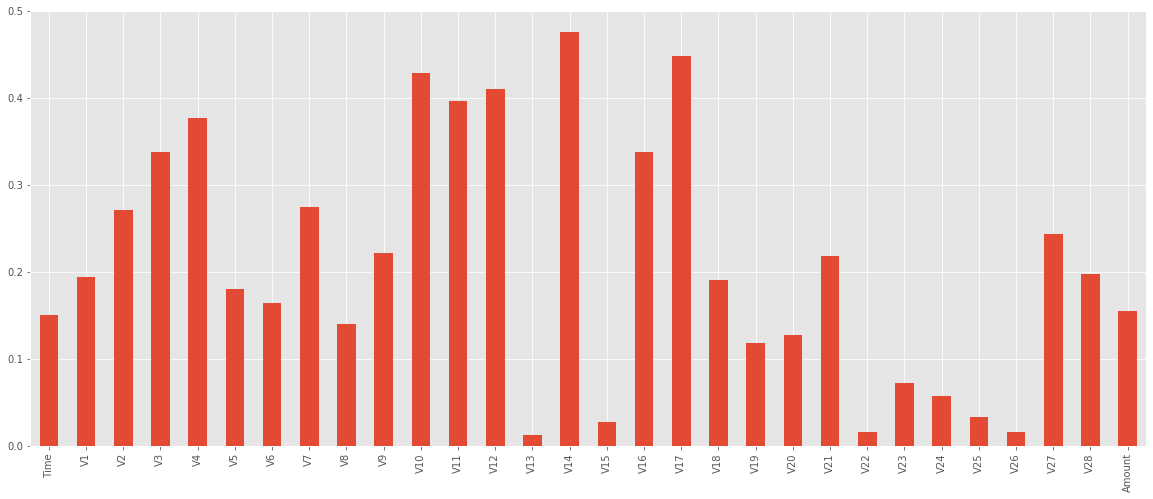

In [45]:
mutual_info.plot.bar(figsize=(20, 8))

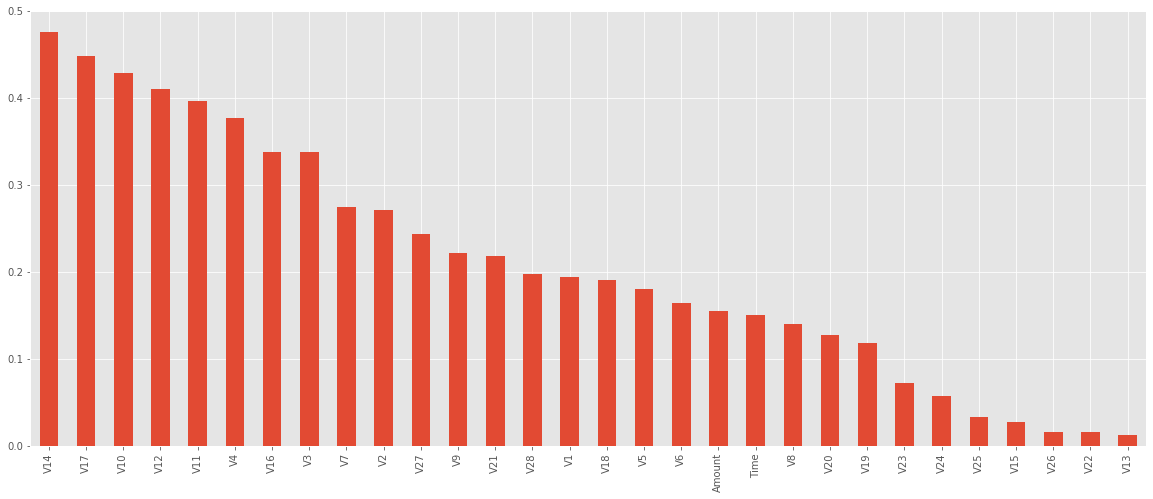

In [46]:
mutual_info.sort_values(ascending = False).plot.bar(figsize=(20, 8))

In [47]:
from sklearn.feature_selection import SelectKBest

In [48]:
# Now we will be selecting top 20 features
sel_five_cols= SelectKBest(mutual_info_classif, k=21)
sel_five_cols.fit(X_train,Y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14',
       'V16', 'V17', 'V18', 'V21', 'V27', 'V28', 'Amount'],
      dtype='object')

Following are the top features that are important for our model training

In [49]:
#Dropping non significant features
X_train.drop(['V13','V15','V19','V20','V22','V23','V24','V25','V26'], axis=1 , inplace= True)

c:\users\gaurav\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V21,V27,V28,Amount
100623,67571.0,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,0.618203,-1.769060,-0.651414,-0.005423,0.217470,-1.173978,0.243347,-0.342301,0.042619,0.150606,-0.117140,549.06
281034,169897.0,-2.138481,-2.920025,-2.977758,-0.589955,1.318972,-2.042637,1.135533,-0.057572,-1.609202,0.285958,-1.827160,-0.599988,1.183934,-1.986170,0.068162,1.188598,0.559402,0.278523,-0.028412,399.30
43253,41435.0,-0.570169,1.074801,1.511070,0.067227,-0.057432,-0.833378,0.758141,-0.110427,0.091136,-0.000305,0.388439,-0.558013,-0.401705,-0.108350,0.437810,-0.653210,-0.299909,0.204759,-0.069334,8.92
11268,19563.0,1.043669,0.024266,1.191669,2.871537,-0.444035,0.757353,-0.602499,0.187872,1.710186,0.057137,-1.075877,-3.029124,1.079406,0.610885,0.290674,0.235829,-0.376147,-0.004599,0.029088,71.50
11506,19902.0,1.442948,-0.529280,0.398502,-0.366609,-0.879701,-0.495975,-0.749817,-0.139545,1.074936,0.161533,-0.346673,-3.706165,1.191424,0.763971,1.290720,-1.162939,-0.225115,-0.021123,-0.002161,5.00


# Model training

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [52]:
logistic = LogisticRegression()

In [53]:
logistic.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Evaluation

In [54]:
# checking accuracy of training data

In [55]:
X_train_pred = logistic.predict(X_train)
train_data_accuracy = accuracy_score(X_train_pred, Y_train)

In [56]:
# accuracy of training data
print(train_data_accuracy)

0.9351969504447268


In [57]:
#Removing the unwanted features from the test set
X_test.drop(['V13','V15','V19','V20','V22','V23','V24','V25','V26'], axis=1, inplace= True)

c:\users\gaurav\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Model Testing

In [58]:
X_test_pred = logistic.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

In [59]:
print(test_data_accuracy)

0.9289340101522843


In [60]:
import pickle

In [61]:
with open('Credit_Card_pickle','wb') as f:
    pickle.dump(logistic,f)

In [62]:
with open('Credit_Card_pickle','rb') as f:
    classifier = pickle.load(f)

In [63]:
# 1.0	-1.358354	-1.340163	1.773209	0.379780	-0.503198	1.800499	0.791461	0.247676	-1.514654	0.207643	0.624501	0.066084	0.717293	-0.165946	2.345865	-2.890083	1.109969	-0.121359	-2.261857	0.524980	0.247998	0.771679	0.909412	-0.689281	-0.327642	-0.139097	-0.055353	-0.059752	378.66	
Time=1.56738000e+05 
v1= 2.05177897e+00 
v2=2.49040678e-02 
v3=-1.82775529e+00
v4=2.42284099e-01
v5= 5.25845178e-01 
v6=-4.11303003e-01 
v7= 6.99788939e-03
v8 =-1.23070379e-02 
v9=  4.09845334e-01 
v10=-1.78859187e-01 
v11=6.91279519e-01
v12=1.92218198e-01
v13 =-9.93990945e-01
v14 =-4.61431939e-01
v15 =-3.61058254e-01
v16=6.47275066e-01 
v17=  1.73759260e-01 
v18= 4.10098799e-01 
v19=4.60795739e-01
v20= -2.00548494e-01 
v21=-3.44039172e-01 
v22=-9.70790181e-01 
v23 = 3.02898193e-01
v24= 1.57715168e-01 
v25= -2.83502801e-01 
v26=  1.75958267e-01 
v27=-7.36481818e-02
v28=-4.57953374e-02 
Amount= 1.98000000e+00

In [64]:
y_pred= classifier.predict([[Time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v14,v16,v17,v18,v21,v27,v28,Amount]])

In [65]:
y_pred

array([0], dtype=int64)

In [67]:
y_pred= classifier.predict([[472, -3.043540624, -3.157307121, 1.08846278, 2.288643618, 1.35980513, -1.064822523, 0.325574266, -0.067793653, -0.270952836, -0.838586565, -0.414575448, -0.50314086, -1.692028933, 0.666779696, 0.599717414, 1.725321007, 0.661695925, -0.252773123, 0.035764225, 529]])
y_pred

array([1], dtype=int64)